# Data retrieval bikes - final

In [1]:
#1. Get a dataset of all Zählstellen
import json
import pandas as pd
import requests
import numpy as np


In [2]:
#read the data from the web
response = requests.get("https://iot.hamburg.de/v1.0/Datastreams?$filter=properties/serviceName eq 'HH_STA_HamburgerRadzaehlnetz' and properties/layerName eq 'Anzahl_Fahrraeder_Zaehlstelle_1-Tag'&$top=500")

In [3]:
#Turn the JSON response in usable data
#Extract the data from the the response object
betterdata=response.json()
#only select the data, which are under the heading "value" and convert this to a pandas dataframe
test = betterdata["value"]
df = pd.DataFrame.from_dict(test)
df.head()

,description,@iot.id,name,observationType,observedArea,phenomenonTime,properties,resultTime,@iot.selfLink,unitOfMeasurement,ObservedProperty@iot.navigationLink,Observations@iot.navigationLink,Thing@iot.navigationLink,Sensor@iot.navigationLink
0,Die Anzahl der vom Infrarotdetektor erfassten ...,11834,Fahrradaufkommen an Verkehrszählstelle 7434930...,http://defs.opengis.net/elda-common/ogc-def/re...,"{'type': 'Point', 'coordinates': [10.036556, 5...",2019-12-31T23:00:00.000Z/2021-08-27T21:59:59.000Z,{'metadata': 'https://registry.gdi-de.org/id/d...,2020-11-11T16:24:48.621Z/2021-08-28T01:17:09.297Z,https://iot.hamburg.de/v1.0/Datastreams(11834),"{'name': 'Anzahl', 'symbol': None, 'definition...",https://iot.hamburg.de/v1.0/Datastreams(11834)...,https://iot.hamburg.de/v1.0/Datastreams(11834)...,https://iot.hamburg.de/v1.0/Datastreams(11834)...,https://iot.hamburg.de/v1.0/Datastreams(11834)...
1,Die Anzahl der vom Infrarotdetektor erfassten ...,12142,Fahrradaufkommen an Verkehrszählstelle 7434931...,http://defs.opengis.net/elda-common/ogc-def/re...,"{'type': 'Point', 'coordinates': [10.036414, 5...",2019-12-31T23:00:00.000Z/2021-08-27T21:59:59.000Z,{'metadata': 'https://registry.gdi-de.org/id/d...,2020-11-11T16:24:48.802Z/2021-08-28T01:17:09.334Z,https://iot.hamburg.de/v1.0/Datastreams(12142),"{'name': 'Anzahl', 'symbol': None, 'definition...",https://iot.hamburg.de/v1.0/Datastreams(12142)...,https://iot.hamburg.de/v1.0/Datastreams(12142)...,https://iot.hamburg.de/v1.0/Datastreams(12142)...,https://iot.hamburg.de/v1.0/Datastreams(12142)...
2,Die Anzahl der vom Infrarotdetektor erfassten ...,11838,Fahrradaufkommen an Verkehrszählstelle 7434932...,http://defs.opengis.net/elda-common/ogc-def/re...,"{'type': 'Point', 'coordinates': [10.036746, 5...",2019-12-31T23:00:00.000Z/2021-08-27T21:59:59.000Z,{'metadata': 'https://registry.gdi-de.org/id/d...,2020-11-11T16:24:48.962Z/2021-08-28T01:17:09.365Z,https://iot.hamburg.de/v1.0/Datastreams(11838),"{'name': 'Anzahl', 'symbol': None, 'definition...",https://iot.hamburg.de/v1.0/Datastreams(11838)...,https://iot.hamburg.de/v1.0/Datastreams(11838)...,https://iot.hamburg.de/v1.0/Datastreams(11838)...,https://iot.hamburg.de/v1.0/Datastreams(11838)...
3,Die Anzahl der vom Infrarotdetektor erfassten ...,12560,Fahrradaufkommen an Verkehrszählstelle 0002981...,http://defs.opengis.net/elda-common/ogc-def/re...,"{'type': 'Point', 'coordinates': [9.868921, 53...",2020-04-28T22:00:00.000Z/2021-08-27T21:59:59.000Z,{'metadata': 'https://registry.gdi-de.org/id/d...,2020-11-11T19:12:40.094Z/2021-08-28T01:17:46.659Z,https://iot.hamburg.de/v1.0/Datastreams(12560),"{'name': 'Anzahl', 'symbol': None, 'definition...",https://iot.hamburg.de/v1.0/Datastreams(12560)...,https://iot.hamburg.de/v1.0/Datastreams(12560)...,https://iot.hamburg.de/v1.0/Datastreams(12560)...,https://iot.hamburg.de/v1.0/Datastreams(12560)...
4,Die Anzahl der vom Infrarotdetektor erfassten ...,12564,Fahrradaufkommen an Verkehrszählstelle 0002982...,http://defs.opengis.net/elda-common/ogc-def/re...,"{'type': 'Point', 'coordinates': [9.86886, 53....",2020-04-28T22:00:00.000Z/2021-08-27T21:59:59.000Z,{'metadata': 'https://registry.gdi-de.org/id/d...,2020-11-11T19:12:40.239Z/2021-08-28T01:17:46.688Z,https://iot.hamburg.de/v1.0/Datastreams(12564),"{'name': 'Anzahl', 'symbol': None, 'definition...",https://iot.hamburg.de/v1.0/Datastreams(12564)...,https://iot.hamburg.de/v1.0/Datastreams(12564)...,https://iot.hamburg.de/v1.0/Datastreams(12564)...,https://iot.hamburg.de/v1.0/Datastreams(12564)...


In [4]:
#2. Loop through the links of all "Zählstellen" to receive a dataset of the nr. of vehicles for every day/every "Zählstelle"

## generate links and append to df
df["links"] = df["Observations@iot.navigationLink"].apply(lambda x: x + "?$top=600")
df['id'] = df['@iot.id']

# clean dataframe where we dont find geo information
# 2 rows should be removed
print(f'Rows before NA removal: {len(df)}')
df = df.dropna()
print(f'Rows after NA removal: {len(df)}')
# extract the lat/long information to join later
df['long'] = df['observedArea'].apply(lambda x: x['coordinates'][0]).apply(lambda x: x if isinstance(x,float) else x[0])
df['lat'] = df['observedArea'].apply(lambda x: x['coordinates'][1]).apply(lambda x: x if isinstance(x,float) else x[1])

Rows before NA removal: 121
Rows after NA removal: 121


In [5]:
# create a list for the results
columns = ['@iot.id','phenomenonTime', 'result','resultTime']
missing_data = list()
df_complete = pd.DataFrame(columns = columns)

unique_links = df["links"].unique()

for link in unique_links:
    print(f'Retrieving data for {link}')
    response = requests.get(link)
    json = response.json()
    df_temp = pd.DataFrame.from_dict(json["value"])
    if set(columns).issubset(set(df_temp.columns)):
        df_temp = df_temp[columns]
        df_temp['id'] = link[40:45]
        df_complete = df_complete.append(df_temp,sort=False)
#        df_complete['id'] = df_complete['id'].astype('int64')
    else:
        # no data available
        print(f'---- WARNING: No data available or wrong columns selected for {link}')
        missing_data.append(link)
df_complete['id'] = df_complete['id'].astype('int64')
df_complete['result'] = df_complete['result'].astype('int64')

Retrieving data for https://iot.hamburg.de/v1.0/Datastreams(11834)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.0/Datastreams(12142)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.0/Datastreams(11838)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.0/Datastreams(12560)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.0/Datastreams(12564)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.0/Datastreams(12544)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.0/Datastreams(11858)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.0/Datastreams(12548)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.0/Datastreams(11878)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.0/Datastreams(11874)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.0/Datastreams(12819)/Observations?$top=600
Retrieving data for h

Retrieving data for https://iot.hamburg.de/v1.0/Datastreams(12891)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.0/Datastreams(12895)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.0/Datastreams(12899)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.0/Datastreams(11958)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.0/Datastreams(12777)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.0/Datastreams(14892)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.0/Datastreams(11818)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.0/Datastreams(11814)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.0/Datastreams(11810)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.0/Datastreams(12725)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.0/Datastreams(11846)/Observations?$top=600
Retrieving data for h

In [6]:
missing_data

[]

In [7]:
len(df_complete)

46146

In [8]:
df_complete.head()

,@iot.id,phenomenonTime,result,resultTime,id
0,45943231,2020-12-22T23:00:00.000Z/2020-12-23T22:59:59.000Z,1197,2020-12-24T01:32:17.376Z,11834
1,46123566,2020-12-23T23:00:00.000Z/2020-12-24T22:59:59.000Z,472,2020-12-25T01:32:14.176Z,11834
2,46306429,2020-12-24T23:00:00.000Z/2020-12-25T22:59:59.000Z,490,2020-12-26T01:32:08.698Z,11834
3,46482553,2020-12-25T23:00:00.000Z/2020-12-26T22:59:59.000Z,410,2020-12-27T01:32:11.641Z,11834
4,46654277,2020-12-26T23:00:00.000Z/2020-12-27T22:59:59.000Z,321,2020-12-28T01:32:15.505Z,11834


In [9]:
df_raw = pd.merge(df_complete,df[['id','lat','long']], how='inner',on='id')
                        

In [10]:
df_raw.head()

,@iot.id,phenomenonTime,result,resultTime,id,lat,long
0,45943231,2020-12-22T23:00:00.000Z/2020-12-23T22:59:59.000Z,1197,2020-12-24T01:32:17.376Z,11834,53.575722,10.036556
1,46123566,2020-12-23T23:00:00.000Z/2020-12-24T22:59:59.000Z,472,2020-12-25T01:32:14.176Z,11834,53.575722,10.036556
2,46306429,2020-12-24T23:00:00.000Z/2020-12-25T22:59:59.000Z,490,2020-12-26T01:32:08.698Z,11834,53.575722,10.036556
3,46482553,2020-12-25T23:00:00.000Z/2020-12-26T22:59:59.000Z,410,2020-12-27T01:32:11.641Z,11834,53.575722,10.036556
4,46654277,2020-12-26T23:00:00.000Z/2020-12-27T22:59:59.000Z,321,2020-12-28T01:32:15.505Z,11834,53.575722,10.036556


## Debug section

In [11]:
# only for debugging
columns_test = ['@iot.id','phenomenonTime', 'result','resultTime']
missing_data_test = list()
df_complete_test = pd.DataFrame(columns = columns_test)

# first link doesnt return data, second one works
unique_links_test = ['https://iot.hamburg.de/v1.1/Datastreams(13196)/Observations?$top=600',
                     'https://iot.hamburg.de/v1.1/Datastreams(13596)/Observations?$top=600']

for link in unique_links_test:
    print(f'Retrieving data for {link}')
    response = requests.get(link)
    json = response.json()
    df_temp_test = pd.DataFrame.from_dict(json["value"])
    if set(columns_test).issubset(set(df_temp_test.columns)):
        df_temp_test = df_temp_test[columns_test]
        df_temp_test['id'] = link[40:45]
        df_complete_test = df_complete_test.append(df_temp_test,sort=False)
        df_complete_test['id'] = df_temp_test['id'].astype('int64')
    else:
        # no data available
        print(f'---- WARNING: No data available or wrong columns selected for {link}')
        missing_data_test.append(link)


Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13196)/Observations?$top=600
---- WARNING: No data available or wrong columns selected for https://iot.hamburg.de/v1.1/Datastreams(13196)/Observations?$top=600
Retrieving data for https://iot.hamburg.de/v1.1/Datastreams(13596)/Observations?$top=600


In [12]:
df_raw_test = pd.merge(df_complete_test,df[['id','lat','long']], how='inner',on='id')
                        

In [13]:
df_raw_test

,@iot.id,phenomenonTime,result,resultTime,id,lat,long


Visualisierung - Patricia
1. Wochentage rausfinden und Durchschnitt über Wochentage legen

In [14]:
weekday_list=[]

for i in df_raw['phenomenonTime']:
    t = i[25:35]
    day = pd.Timestamp(t)
    weekday = day.day_name()
    print(weekday)

weekday_list.append(weekday)



Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Monday
Wednesday
Thursday
Friday
Saturday
Tuesday
Sunday
Wednesday
Wednesday
Friday
Thursday
Saturday
Sunday
Saturday
Monday
Tuesday
Thursday
Wednesday
Friday
Saturday
Monday
Sunday
Tuesday
Sunday
Thursday
Friday
Tuesday
Monday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Saturday
Friday
Sunday
Wednesday
Monday
Tuesday
Thursday
Friday
Sunday
Saturday
Tuesday
Thursday
Monday
Wednesday
Thursday
Monday
Friday
Sunday
Saturday
Tuesday
Wednesday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Saturday
Friday
Sunday
Monday
Wednesday
Tuesday
Thursday
Monday
Sunday
Friday
Saturday
Wednesday
Thursday
Tuesday
Friday
Saturday
Sunday
Monday
Tuesday
Thursday
Wednesday
Thursday
Saturday
Friday
Saturday
Monday
Sunday
Tuesday
Wednesday
Friday
Monday
Sunday
Thursday
Saturday
Tuesday
Wednesday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Satu

Sunday
Monday
Tuesday
Wednesday
Thursday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Sunday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
W

Saturday
Sunday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Sunday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Thursday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Wednesday
Tuesday
Friday
Monday
Wednesday
Wednesday
Wednesday
Thursday
Saturday
Frida

Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Thursday
Friday
Wednesday
Saturday
Wednesday
Tuesday
Sunday
Monday
Saturday
Thursday
Friday
Sunday
Monday
Tuesday
Thursday
Wednesday
Friday
Saturday
Sunday
Tuesday
Monday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Thursday
Wednesday
Th

Wednesday
Thursday
Friday
Saturday
Sunday
Tuesday
Monday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Saturday
Friday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Frid

Monday
Tuesday
Wednesday
Thursday
Thursday
Friday
Saturday
Sunday
Saturday
Monday
Tuesday
Friday
Wednesday
Monday
Sunday
Tuesday
Wednesday
Thursday
Friday
Sunday
Saturday
Wednesday
Tuesday
Monday
Thursday
Friday
Saturday
Sunday
Tuesday
Monday
Wednesday
Thursday
Friday
Sunday
Saturday
Monday
Tuesday
Monday
Wednesday
Thursday
Friday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Wednesday
Tuesday
Saturday
Thursday
Sunday
Monday
Tuesday
Wednesday
Wednesday
Thursday
Saturday
Friday
Saturday
Sunday
Monday
Tuesday
Thursday
Friday
Sunday
Sunday
Tuesday
Wednesday
Tuesday
Thursday
Friday
Saturday
Monday
Wednesday
Saturday
Thursday
Friday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Sunday
Saturday
Monday
Wednesday
Tuesday
Thursday
Friday
Saturday
Sunday
Monday
Thursday
Monday
Wednesday
Tuesday
Friday
Saturday
Sunday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Thursday
Tuesday
Monday
Wednesday
Thursday
Saturday
Friday
Sunday
Wednesday
Wednesday
Mo

Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Friday
Tuesday
Saturday
Sunday
Monday
Tuesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Saturday
Friday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturda

Thursday
Friday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Thursday
Friday
Tuesday
Wednesday
Friday
Saturday
Monday
Tuesday
Thursday
Wednesday
Sunday
Saturday
Monday
Tuesday
Wednesday
Thursday
Sunday
Friday
Saturday
Monday
Tuesday
Wednesday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Tuesday
Monday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Sunday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wed

Wednesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Saturday
Sunday
Tuesday
Wednesday
Thursday
Saturday
Friday
Monday
Wednesday
Thursday
Tuesday
Saturday
Friday
Friday
Sunday
Saturday
Monday
Wednesday
Tuesday
Thursday
Thursday
Sunday
Sunday
Monday
Tuesday
Wednesday
Thursday
Saturday
Friday
Monday
Tuesday
Wednesday
Wednesday
Friday
Saturday
Sunday
Monday
Tuesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Saturday
Friday
Sunday
Wednesday
Thursday
Monday
Tuesday
Friday
Thursday
Saturday
Monday
Sunday
Monday
Tuesday
Wednesday
Tuesday
Wednesday
Friday
Saturday
Sunday
Saturday
Sunday
Tuesday
Monday
Wednesday
Thursday
Friday
Saturday
Sunday
Tuesday
Thursday
Monday
Wednesday
Friday
Monday
Tuesday
Wednesday
Wednesday
Friday
Thursday
Sunday
S

Thursday
Friday
Saturday
Sunday
Tuesday
Wednesday
Thursday
Friday
Tuesday
Sunday
Saturday
Monday
Thursday
Thursday
Wednesday
Friday
Saturday
Wednesday
Sunday
Monday
Tuesday
Friday
Saturday
Sunday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Friday
Saturday
Thursday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Monday
Tuesday
Thursday
Wednesday
Friday
Saturday
Sunday
Thursday
Sunday
Wednesday
Tuesday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Friday
Thursday
Saturday
Monday
Thursday
Tuesday
Wednesday
Thursday
Monday
Friday
Saturday
Sunday
Thursday
Tuesday
Friday
Wednesday
Saturday
Sunday
Monday
Wednesday
Tuesday
Thursday
Friday
Saturday
Thursday
Sunday
Monday
Tuesday
Wednesday
Friday
Sunday
Saturday
Monday
Wednesday
Tuesday
Sunday
Thursday
Saturday
Friday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Thursday
Wednesday
Saturday
Sunday
Monday
Wednesday
Tuesday
Friday
Saturday
Monday
Tuesday
Wednesday
Friday
Thurs

Monday
Tuesday
Wednesday
Thursday
Friday
Sunday
Saturday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Monday
Tuesday
Saturday
Wednesday
Thursday
Sunday
Monday
Tuesday
Wednesday
Thursday
Sunday
Friday
Monday
Tuesday
Wednesday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Tuesday
Monday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Sunday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Frida

Monday
Tuesday
Sunday
Thursday
Wednesday
Tuesday
Friday
Wednesday
Thursday
Friday
Thursday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Saturday
Friday
Sunday
Monday
Tuesday
Thursday
Wednesday
Friday
Saturday
Sunday
Tuesday
Monday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Wednesday
Tuesday
Sunday
Friday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Monday
Saturday
Sunday
Monday
Saturday
Tuesday
Wednesday
Thursday
Friday
Saturday
Monday
Tuesday
Thursday
Wednesday
Saturday
Sunday
Tuesday
Wednesday
Monday
Friday
Sunday
Tuesday
Wednesday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Tuesday
Monday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wedne

Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Thursday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Wednesday
Tuesday
Friday
Monday
Wednesday
Wednesday
Wednesday
Thursday
Saturday
Friday
Saturday
Sunday
Sunday
Tuesday
Monday
Tuesday
Wednesday
Wednesday
Thursday
Thursday
Saturday
Friday
Sa

Thursday
Wednesday
Friday
Saturday
Sunday
Saturday
Sunday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Sunday
Wednesday
Thursday
Tuesday
Friday
Monday
Wednesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Thursday
Tuesday
Friday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Tuesday
Monday
Wednesday
Monday
Thursday
Friday
Saturday
Sunday
Friday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Monday
Sunday
Thursday
Tuesday
Wednesday
Sunday
Friday
Saturday
Tuesday
Monday
Wednesday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Tuesday
Monday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Mond

Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Wednesday
Tuesday
Thursday
Monday
Friday
Saturday
Sunday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Sunday
Saturday
Monday
Tuesday
Friday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Thursday
Thursday
Friday
Saturday
Monday
Tuesday
Sunday
Wednesday
Saturday
Wednesday
Monday
Tuesday
Thursday
Friday
Saturday
Monday
Sunday
Tuesday
Wednesday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Tuesday
Monday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Tuesday
Wednesday

Wednesday
Monday
Thursday
Friday
Wednesday
Saturday
Sunday
Thursday
Monday
Friday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Tuesday
Sunday
Monday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Wednesday
Monday
Thursday
Friday
Saturday
Monday
Sunday
Thur

Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Wednesday
Tuesday
Friday
Monday
Wednesday
Wednesday
Thursday
Saturday
Friday
Saturday
Sunday
Sunday
Tuesday
Monday
Tuesday
Wednesday
Wednesday
Thursday
Thursday
Saturday
Friday
Saturday
Friday
Sunday
Monday
Sunday
Tuesday
Tuesday
Wednesday
Monday
Thursday
Friday
Wednesday
Saturday
Sunday
Thursday
Monday
Friday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesda

Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Thursday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Wednesday
Tuesday
Friday
Monday
Wednesday
Thursday
Saturday
Friday
Saturday
Sunday
Sunday
Tuesday
Monday
Tuesday
Wednesday
Wednesday
Thursday
Thursday
Saturday
Friday
Saturday
Friday
Sunday
Monday
Sunday
Tuesday
Tuesday
Wednesday
Monday
Thursday
Friday
Wednesday
Saturday
Sunday
Thursday
Monday
Friday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday


Wednesday
Thursday
Wednesday
Friday
Sunday
Saturday
Monday
Tuesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Saturday
Sunday
Saturday
Tuesday
Monday
Wednesday
Thursday
Friday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Sunday
Friday
Monday
Tuesday
Wednesday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Tuesday
Monday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Saturday
Friday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Satu

Tuesday
Wednesday
Thursday
Friday
Wednesday
Friday
Sunday
Monday
Tuesday
Wednesday
Thursday
Saturday
Friday
Sunday
Friday
Monday
Wednesday
Tuesday
Thursday
Tuesday
Saturday
Sunday
Monday
Wednesday
Thursday
Saturday
Sunday
Tuesday
Monday
Tuesday
Friday
Wednesday
Thursday
Saturday
Sunday
Monday
Thursday
Wednesday
Friday
Saturday
Sunday
Monday
Tuesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Sunday
Thursday
Friday
Saturday
Monday
Wednesday
Tuesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Saturday
Friday
Sunday
Monday
Wednesday
Tuesday
Wednesday
Thursday
Saturday
Friday
Sunday
Monday
Tuesday
Thursday
Saturday
Friday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Friday
Tuesday
Monday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Sunday
Wednesday
Thursday
Saturday
Tuesday
Monday
Sunday
Wednesday
Thursday
Friday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursd

Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Thursday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Wednesday
Tuesday
Friday
Monday
Wednesday
Thursday
Saturday
Friday
Saturday
Sunday
Sunday
Tuesday
Monday
Tuesday
Wednesday
Wednesday
Thursday
Thursday
Saturday
Friday
Saturday
Friday
Sunday
Monday
Sunday
Tuesday
Tuesday
Wednesday
Monday
Thursday
Friday
Wednesday
Saturday
Sunday
Thursday
Monday
Friday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thurs

Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Friday
Saturday
Sunday
Monday
Tuesda

Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Thursday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Wednesday
Tuesday
Friday
Monday
Wednesday
Thursday
Saturday
Friday
Saturday
Sunday
Sunday
Tuesday
Monday
Tuesday
Wednesday
Wednesday
Thursday
Thursday
Saturday
Friday
Saturday
Friday
Sunday
Monday
Sunday
Tuesday
Tuesday
Wednesday
Monday
Thursday
Friday
Wednesday
Saturday
Sunday
Thursday
Monday
Friday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thurs

Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Saturday
Friday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday


Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Thursday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Wednesday
Tuesday
Friday
Monday
Wednesday
Thursday
Saturday
Friday
Saturday
Sunday
Sunday
Tuesday
Monday
Tuesday
Wednesday
Wednesday
Thursday
Thursday
Saturday
Friday
Saturday
Friday
Sunday
Monday
Sunday
Tuesday
Tuesday
Wednesday
Monday
Thursday
Friday
Wednesday
Saturday
Sunday
Thursday
Monday
Friday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesd

Thursday
Sunday
Monday
Monday
Wednesday
Friday
Sunday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday


Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Thursday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Wednesday
Tuesday
Friday
Monday
Wednesday
Thursday
Saturday
Friday
Saturday
Sunday
Sunday
Tuesday
Monday
Tuesday
Wednesday
Wednesday
Thursday
Thursday
Saturday
Friday
Saturday
Friday
Sunday
Monday
Sunday
Tuesday
Tuesday
Wednesday
Monday
Thursday
Friday
Wednesday
Saturday
Sunday
Thursday
Monday
Friday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
T

Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Saturday
Friday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
T

Thursday
Thursday
Friday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Sunday
Friday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Thursday
Wednesday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Sunday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Sunday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Tuesday
Monday
Wednesday
Sunday
Tuesday
Saturday
Friday
Thursday
Monday
Sunday
Wednesday
Thursday
Tuesday
Tuesday
Wednesday
Saturday
Thursday
Wednesday
Friday
Thursday
Sunday
Monday
Tuesday
Wednesday
Friday
Saturday
Tuesday
Sunday
Monday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Thursday
Saturday
Friday
Sunday
Tuesday
Monday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Frid

Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monda

Thursday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Friday
Saturday
Sunday
Monday
Tuesday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Sunday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursda

Friday
Thursday
Saturday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Sunday
Wednesday
Thursday
Friday
Saturday
Monday
Thursday
Friday
Tuesday
Wednesday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Saturday
Sunday
Friday
Monday
Tuesday
Thursday
Wednesday
Thursday
Friday
Saturday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Friday
Monday
Tuesday
Wednesday
Saturday
Sunday
Friday
Sunday
Monday
Wednesday
Tuesday
Thursday
Thursday
Monday
Saturday
Tuesday
Wednesday
Friday
Sunday
Saturday
Monday
Tuesday
Wednesday
Thursday
Saturday
Friday
Sunday
Thursday
Monday
Sunday
Tuesday
Wednesday
Friday
Saturday
Tuesday
Monday
Thursday
Wednesday
Friday
Sunday
Tuesday
Monday
Thursday
Wednesday
Saturday
Friday
Sunday
Monday
Wednesday
Thursday
Tuesday
Friday
Sunday
Saturday
Tuesday
Wednesday
Monday
Thursday
Friday
Saturday
Sunday
Tuesday
Monday
Wednesday
Thursday
Saturday
Friday
Sunday
Monday
Tuesday
Wednesday
Friday
Thursday
Sunday
Saturday
Monday

Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Thursday
Friday
Saturday
Thursday
Saturday
Sunday
Sunday
Monday
Monday
Tuesday
Wednesday
Tuesday
Friday
Monday
Wednesday
Wednesday
Wednesday
Thursday
Saturday
Friday
Saturday
Sunday
Sunday
Tuesday
Monday
Tuesday
Wednesday
Wednesday
Thursday
Thursday
Saturday
Friday
Saturday
Friday
Sunday
Monday
Sunday
Tuesday
Tuesday
Wednesday
Monday
Thursday
Friday
Wednesday
Saturday
Sunday
Thursday
Monday
Friday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Monday
Tuesday
Wednesday
Thur

Meistens kann man die apply Funktion für solche Fälle nutzen, also wenn man für jeden Wert oder jede Reihe etwas anwenden will.
Konkret im unteren Beispiel wird `apply(lambda x: get_weekday(x))` für jeden Wert in `df_raw['phenomenonTime']` angewendet und `return weekday`. Das kann dann einfach in eine neue Spalte gespeichert werden (siehe df['weekday'], dieser Key muss vorher nicht existieren)

In [15]:
# Dein Code nur als Funktion
def get_weekday(input_date):
    t = input_date[25:35]
    day = pd.Timestamp(t)
    weekday = day.day_name()
    return weekday

In [16]:
# lass das laufen und du siehst was der Output ist
# ich nutze df_raw_test, damit das etwas schneller ist
df_raw_test['phenomenonTime'].apply(lambda x: get_weekday(x))

Series([], Name: phenomenonTime, dtype: object)

## Debug Ende

In [17]:
# neue Spalte im Dataframe
df_raw['weekday'] = df_raw['phenomenonTime'].apply(lambda x: get_weekday(x))

In [18]:
df_raw.head()

,@iot.id,phenomenonTime,result,resultTime,id,lat,long,weekday
0,45943231,2020-12-22T23:00:00.000Z/2020-12-23T22:59:59.000Z,1197,2020-12-24T01:32:17.376Z,11834,53.575722,10.036556,Wednesday
1,46123566,2020-12-23T23:00:00.000Z/2020-12-24T22:59:59.000Z,472,2020-12-25T01:32:14.176Z,11834,53.575722,10.036556,Thursday
2,46306429,2020-12-24T23:00:00.000Z/2020-12-25T22:59:59.000Z,490,2020-12-26T01:32:08.698Z,11834,53.575722,10.036556,Friday
3,46482553,2020-12-25T23:00:00.000Z/2020-12-26T22:59:59.000Z,410,2020-12-27T01:32:11.641Z,11834,53.575722,10.036556,Saturday
4,46654277,2020-12-26T23:00:00.000Z/2020-12-27T22:59:59.000Z,321,2020-12-28T01:32:15.505Z,11834,53.575722,10.036556,Sunday


Maren
Goal: Create "clean" csv file, so everyone can work with that from now on

advantages: 
- no useless columns anymore
- the downloaded data/dates don´t change any more
- otherwise with every time running the codes a dataset with daily updated data occurs, which might confuse our results


In [19]:
# convert the dates to a correct format
phenomenonTime = df_raw["phenomenonTime"]

phenomenonTime=phenomenonTime.astype(str)
phenomenonDate=phenomenonTime.str.replace("(.*)\/", "", regex = True)
phenomenonDate=phenomenonDate.str.replace("T(.*)", "", regex = True)

df_raw["phenomenonDate"] = pd.to_datetime(phenomenonDate)



In [20]:
df_raw.dtypes

@iot.id                   object
phenomenonTime            object
result                     int64
resultTime                object
id                         int64
lat                      float64
long                     float64
weekday                   object
phenomenonDate    datetime64[ns]
dtype: object

In [21]:
# Keep only relevant columns
columns = ['@iot.id','phenomenonDate', 'result','id','lat','long','weekday']

In [22]:
df_raw = df_raw[columns]

In [23]:
df_raw

,@iot.id,phenomenonDate,result,id,lat,long,weekday
0,45943231,2020-12-23,1197,11834,53.575722,10.036556,Wednesday
1,46123566,2020-12-24,472,11834,53.575722,10.036556,Thursday
2,46306429,2020-12-25,490,11834,53.575722,10.036556,Friday
3,46482553,2020-12-26,410,11834,53.575722,10.036556,Saturday
4,46654277,2020-12-27,321,11834,53.575722,10.036556,Sunday
...,...,...,...,...,...,...,...
46141,207515356,2021-07-31,615,11830,53.580531,9.999549,Saturday
46142,208609441,2021-08-01,754,11830,53.580531,9.999549,Sunday
46143,210227727,2021-08-02,1788,11830,53.580531,9.999549,Monday
46144,211940543,2021-08-03,2270,11830,53.580531,9.999549,Tuesday


Maren: Clean rest of the dataset
- Are there results with 0 ? --> Drop
- Are there duplicates in Zählstellen/ phenomenondate? --> Drop one of them

In [24]:
#drop all observations which have 0 as result
df_raw[df_raw.result!=0]

,@iot.id,phenomenonDate,result,id,lat,long,weekday
0,45943231,2020-12-23,1197,11834,53.575722,10.036556,Wednesday
1,46123566,2020-12-24,472,11834,53.575722,10.036556,Thursday
2,46306429,2020-12-25,490,11834,53.575722,10.036556,Friday
3,46482553,2020-12-26,410,11834,53.575722,10.036556,Saturday
4,46654277,2020-12-27,321,11834,53.575722,10.036556,Sunday
...,...,...,...,...,...,...,...
46141,207515356,2021-07-31,615,11830,53.580531,9.999549,Saturday
46142,208609441,2021-08-01,754,11830,53.580531,9.999549,Sunday
46143,210227727,2021-08-02,1788,11830,53.580531,9.999549,Monday
46144,211940543,2021-08-03,2270,11830,53.580531,9.999549,Tuesday


<AxesSubplot:xlabel='phenomenonDate', ylabel='id'>

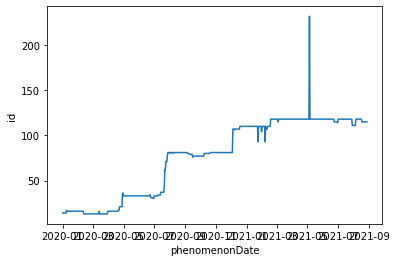

In [25]:
#find problematic observations
#Are there duplicates in combination Zählstellen/ phenomenondate? 


## pivot: count numbers of Zählstellen("id") per phenomenondate --> saved as CountZählstelle
CountZaehlstelle = df_raw.pivot_table(values = "id", index = "phenomenonDate", aggfunc= "count")

import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=CountZaehlstelle, x = "phenomenonDate", y = "id")



In [26]:
CountZaehlstelle
## find the problematic dates: There were measured almost double the Zählstellen than on the other dates
CountZaehlstelle[CountZaehlstelle.id > 150]

,id
phenomenonDate,
2021-05-05,232


In [27]:
##--> problematic dates are: 2021-05-05
Problemdata = df_raw[df_raw.phenomenonDate == "2021-05-05"]

## pivot: Find out whether entries for the problematic Zählstelle are so close together that we can just drop one of each
Problemdata_piv = Problemdata.pivot_table(values = "result", index = "id", aggfunc = lambda x: max(x) - min(x))
Problemdata_piv[Problemdata_piv.result > 0]

##--> result: yes, we can drop duplicates in the dataset according to id/phenomenonDate 
## because the difference in result between the duplicates is not so big

,result
id,


In [28]:
#drop duplicates
df_raw=df_raw.drop_duplicates(['phenomenonDate','id'],keep= 'first')


<AxesSubplot:xlabel='phenomenonDate', ylabel='id'>

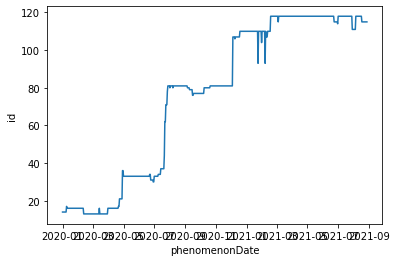

In [29]:
## pivot: count numbers of Zählstellen("id") per phenomenondate 
CountZaehlstelle_final = df_raw.pivot_table(values = "id", index = "phenomenonDate", aggfunc= "count")


sns.lineplot(data=CountZaehlstelle_final, x = "phenomenonDate", y = "id")

In [30]:
#save in csv format
df_raw.to_csv(r'C:\Users\Maren\Desktop\TechLabs\hh_techlabs_group12\hh_techlabs_group12\clean_data_bikes_new.csv',index=False)